## Estadística aplciada
Sesion 16 - 24 de octubre

Francisco Javier Chávez Hernández 2034204 G44

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

#ARIMA
from statsmodels.tsa.arima.model import ARIMA
#pmdarima 
import pmdarima as pm

In [3]:
plt.rcParams['figure.figsize']=(10,6)

In [5]:
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
#asignar formato mensual
pasajeros=pasajeros.asfreq('MS')
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

<Axes: xlabel='Month'>

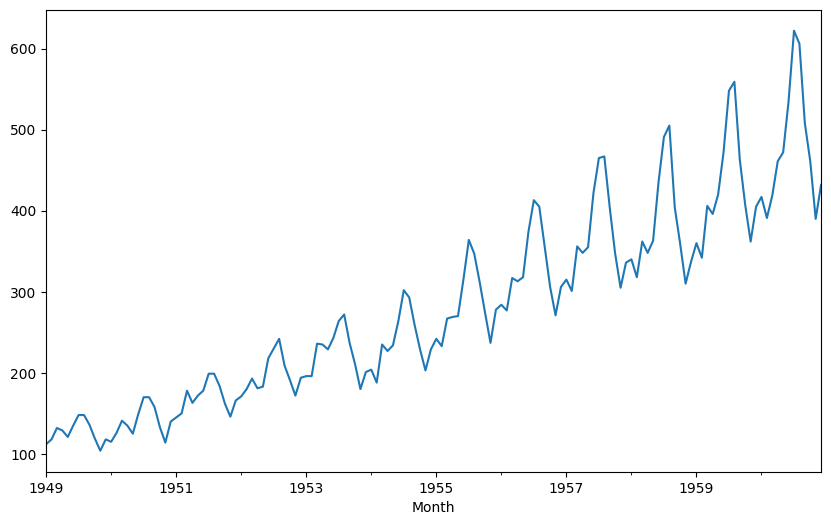

In [10]:
pasajeros['Thousands of Passengers'].plot()

Es una serie con componente estacional

In [12]:
#prueba dickey-fuller
prueba_adf=adfuller(pasajeros['Thousands of Passengers'])
pvalue=prueba_adf[1].round(2)
pvalue


0.99

No rechazamos $H_0$, significa que la serie Thousands of Passengers es no estacionaria

In [16]:
#Aplicando primeras diferencias para hacerla estacionaria
pasajeros['1ras_dif']=pasajeros['Thousands of Passengers'].diff()
pasajeros.head()

,Thousands of Passengers,1ras_dif
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


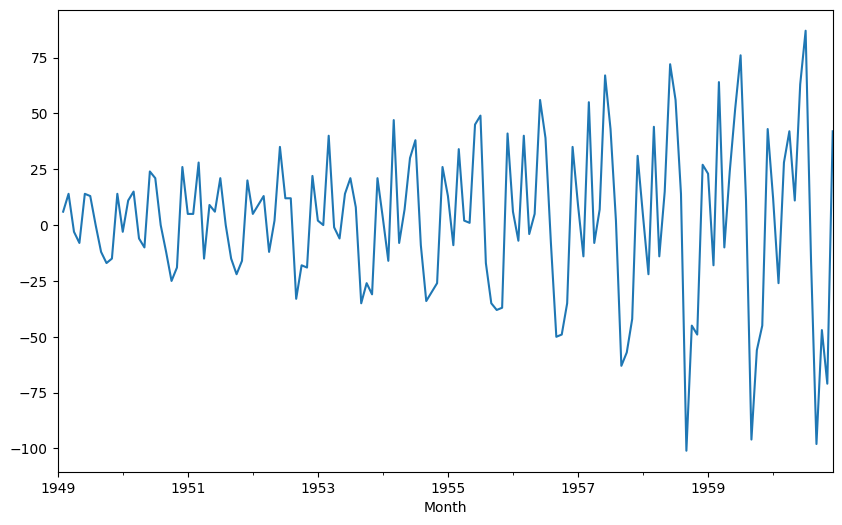

In [18]:
pasajeros['1ras_dif'].plot();

In [20]:
#prueba dickey fuller
prueba_adf1=adfuller(pasajeros['1ras_dif'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(3)

0.054

# Con dos decimales, se rechaza $H_0$, o sea que las 1ras diferencias son estacionarias. Con 3 se puede ver que NO se rechaza $H_0$, es decir que no son estacionarias

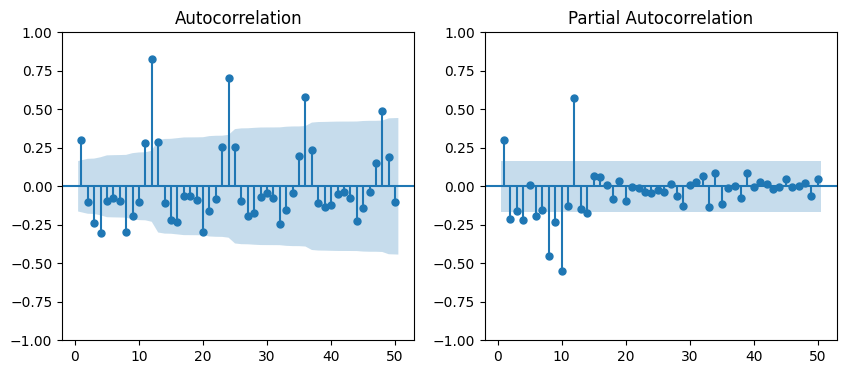

In [23]:
#2 decimales. Graficas de correlaciones
ig, ax=plt.subplots(1,2, figsize=(10,4))
# 1er subg
plot_acf(pasajeros['1ras_dif'].dropna(),zero=False, lags=50, ax=ax[0])
#2nda subg
plot_pacf(pasajeros['1ras_dif'].dropna(),zero=False, lags=50, ax=ax[1])
plt.show()

* (Autocorrelation). Lo sombreado es el intervalo de confianza, los coeficientes que caen fuera son distintos a cero, el resto son cero.
* El patrón de las gráficas de autocorrelación nos muestran una serie con componente estacional


Encontrar el orden del ARIMA(p,I(d),q) utilizando pmdarima

In [28]:
#encontrar el orden del ARIMA
pm.auto_arima(pasajeros['Thousands of Passengers'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              m=12,
              start_P=1,start_Q=1,
              max_P=7,max_Q=7,
              seasonal=True,
              ic='aic',
              error_action="ignore",
              suppress_warnings=True)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Thousands of passengers es una ARIMA(0,1,1)(2,1,0)(12)

In [40]:
model=ARIMA(pasajeros['Thousands of Passengers'], order=(0,1,1),seasonal_order=(2,1,0,12))
results=model.fit()
print(results.summary)


<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x000002335B239490>>


In [41]:
pronostico=results.predict('1961-01-01','1964-12-01')
pronostico=pd.DataFrame(pronostico)

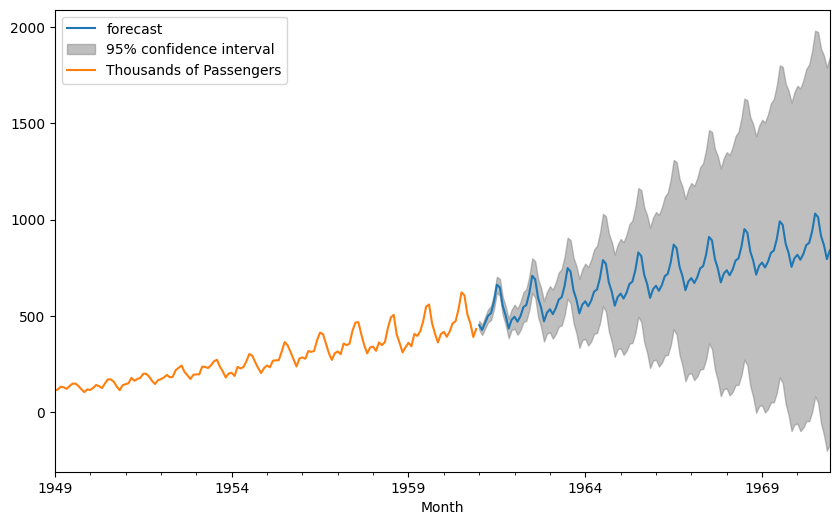

In [49]:
plot_predict(results,start='1961-01-01',end='1970-12-01')
pasajeros['Thousands of Passengers'].plot()
plt.legend(loc='upper left')
plt.show()
